In [1]:
#libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load dataset
data = pd.read_csv(r'C:\Users\Abel\Downloads\Airlines+Data.csv',index_col = 'Month',parse_dates = [0],squeeze=True)

In [4]:
data.head()

Month
Jan-95    112
Feb-95    118
Mar-95    132
Apr-95    129
May-95    121
Name: Passengers, dtype: int64

In [5]:
#statistical info
data.describe()

count     96.000000
mean     213.708333
std       71.918216
min      104.000000
25%      156.000000
50%      200.000000
75%      264.750000
max      413.000000
Name: Passengers, dtype: float64

<AxesSubplot:xlabel='Month'>

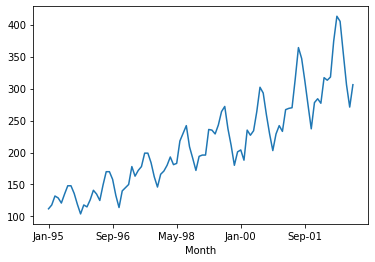

In [6]:
#plot time series
data.plot()

## check the stationarity by adfuller test

In [7]:

from statsmodels.tsa.stattools import adfuller

#null hypothesis : non- stationary 
#alternate hypothesis: stationary
#alpha value : 0.05


result = adfuller(data)
print('p-value:%f' % result[1] )

p-value:0.996825


## As p-value is greater than 0.05 so we will accept the null value which means the time series is not stationary

## making the time series stationary by seasonal differencing


In [8]:
data_difference = data - data.shift(6)

In [9]:
data_difference.dropna(inplace=True)

<AxesSubplot:xlabel='Month'>

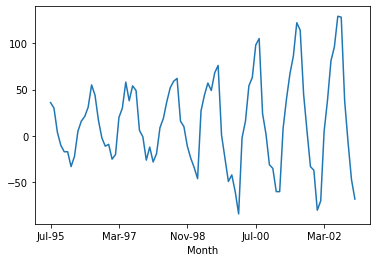

In [10]:
data_difference.plot()

In [11]:
#checking stationary
from statsmodels.tsa.stattools import adfuller

#null hypothesis : non- stationary 
#alternate hypothesis: stationary
#alpha value : 0.05



result = adfuller(data_difference)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.415241
p-value: 0.137481
	1%: -3.513
	5%: -2.897
	10%: -2.586


## p-value is greater than alpha so accept the null which means it is still non stationary

## Using Transformations to make time series stationary

In [12]:
#transformation
data_transformed=np.log(data)

In [13]:
data_transformed.dropna(inplace=True)

<AxesSubplot:xlabel='Month'>

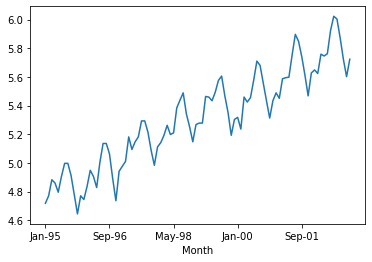

In [14]:
data_transformed.plot()

In [15]:
data_adjusted = data_transformed - data_transformed.shift(6)

In [16]:
data_adjusted.dropna(inplace=True)
data_adjusted 

Month
Jul-95    0.278713
Aug-95    0.226528
Sep-95    0.029853
Oct-95   -0.080689
Nov-95   -0.151400
            ...   
Aug-02    0.379870
Sep-02    0.113216
Oct-02   -0.022618
Nov-02   -0.159933
Dec-02   -0.200671
Name: Passengers, Length: 90, dtype: float64

<AxesSubplot:xlabel='Month'>

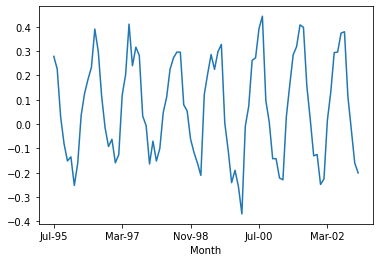

In [17]:
data_adjusted.plot()

In [18]:
#checking stationary
result = adfuller(data_adjusted)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.892158
p-value: 0.046268
	1%: -3.513
	5%: -2.897
	10%: -2.586


## Now the time series is stationary as p-value is less than alpha 

## Naive Model

In [19]:
#Now building the naive model



Naive_model = pd.concat([data,data.shift(1)],axis=1)
Naive_model.dropna(inplace=True)

Naive_model.columns=['Actual' , 'Forecasted']
Naive_model.head(10)

,Actual,Forecasted
Month,,
Feb-95,118,112.0
Mar-95,132,118.0
Apr-95,129,132.0
May-95,121,129.0
Jun-95,135,121.0
Jul-95,148,135.0
Aug-95,148,148.0
Sep-95,136,148.0
Oct-95,119,136.0


In [20]:
#Accuracy
Rmse1= np.sqrt(np.mean(Naive_model['Actual'] - Naive_model['Forecasted'])**2)
Rmse1

2.042105263157895

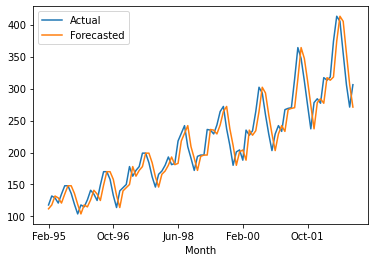

In [21]:
Naive_model['Actual'].plot(label='Actual') 
Naive_model['Forecasted'].plot(label='Forecasted')
plt.legend(loc='best')

## ARIMA MODEL

In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [23]:
#To find p we use pacf
#To find q we use acf

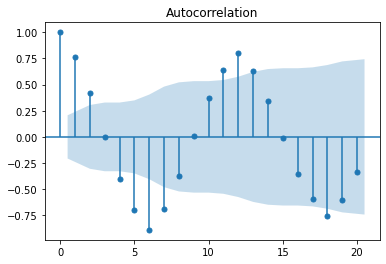

In [24]:
#To determine q
q=plot_acf(data_adjusted)

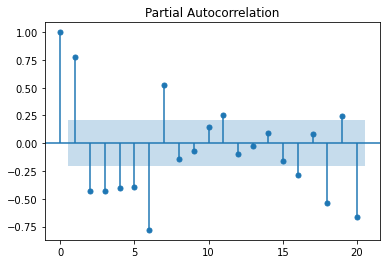

In [25]:
#To determine p
p=plot_pacf(data_adjusted)

In [26]:
#Train-Test
Train = data_adjusted[0:65]
Test = data_adjusted[66:]


In [27]:
#building model
from statsmodels.tsa.arima_model import ARIMA

In [28]:
model2 = ARIMA(Train,order=(2,1,2))
arima_model=model2.fit()

arima_model.summary()

D:\Installation\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Installation\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Installation\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Passengers   No. Observations:                   64
Model:                 ARIMA(2, 1, 2)   Log Likelihood                  54.695
Method:                       css-mle   S.D. of innovations              0.097
Date:                Fri, 04 Jun 2021   AIC                            -97.389
Time:                        11:08:42   BIC                            -84.436
Sample:                             1   HQIC                           -92.286
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0022      0.007      0.325      0.746      -0.011       0.016
ar.L1.D.Passengers     1.7139      0.022     76.939      0.000       1.670       1.758
ar.L2.D.Passengers    -0.9783      0.021    -45.928      0.000      -1.020      -0.937
ma.L1.D.Passengers    -1.8515      0.081    -22.761      0.000      -2.011      -1.692
ma.L2.D.Passengers     0.9996      0.079     12.583      0.000       0.844       1.155
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8760           -0.5048j            1.0110           -0.0832
AR.2            0.8760           +0.5048j            1.0110            0.0832
MA.1            0.9261           -0.3778j            1.0002           -0.0616
MA.2            0.9261           +0.3778j            1.0002            0.0616
-----------------------------------------------------------------------------
"""

In [29]:
#prediction
arima_forecast =arima_model.forecast(steps=24)[0]
arima_forecast

array([-0.20808689, -0.17202192, -0.04508486,  0.13777729,  0.3275904 ,
        0.47460517,  0.54146656,  0.51282073,  0.39889694,  0.23224811,
        0.05866022, -0.07523954, -0.13432827, -0.10402342,  0.0063075 ,
        0.16634312,  0.33327907,  0.46341536,  0.52372911,  0.50037339,
        0.40192206,  0.25661653,  0.10447274, -0.01355366])

In [30]:
#accuracy
RMSE2 =np.sqrt(np.mean(Test - arima_forecast )**2)
RMSE2

0.11948008139296544

## Linear Models

In [31]:
#load the data
data1 = pd.read_csv('c:/users/Abel/Downloads\Airlines+Data.csv')
data1

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121
...,...,...
91,Aug-02,405
92,Sep-02,355
93,Oct-02,306
94,Nov-02,271


In [53]:
#creating dummy variable for months column
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

p=data1['Month'][0]

p[0:3]


'Jan'

In [33]:
data1['months']=0

In [34]:
for i in range(96):
    p=data1['Month'][i]
    data1['months'][i]=p[0:3]
    

In [35]:
dummy= pd.DataFrame(pd.get_dummies(data1['months']))
dummy

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [36]:
add_data1=pd.concat((data1,dummy),axis=1)
add_data1

,Month,Passengers,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,Jan-95,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0
1,Feb-95,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0
2,Mar-95,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0
3,Apr-95,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0
4,May-95,121,May,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Aug-02,405,Aug,0,1,0,0,0,0,0,0,0,0,0,0
92,Sep-02,355,Sep,0,0,0,0,0,0,0,0,0,0,0,1
93,Oct-02,306,Oct,0,0,0,0,0,0,0,0,0,0,1,0
94,Nov-02,271,Nov,0,0,0,0,0,0,0,0,0,1,0,0


In [37]:
t= np.arange(1,97)
add_data1['t']=t  

In [38]:
add_data1['t_square']=add_data1['t']*add_data1['t']
log_passengers=np.log(add_data1['Passengers'])
add_data1['log_Passengers']=log_passengers

In [39]:
add_data1

,Month,Passengers,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
0,Jan-95,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,Feb-95,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,Mar-95,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,Apr-95,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,May-95,121,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Aug-02,405,Aug,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,Sep-02,355,Sep,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,Oct-02,306,Oct,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585
94,Nov-02,271,Nov,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119


In [40]:
#Spliting the data set into train and test
train= add_data1[0:84]
test=add_data1[85:]

## Using linear models

In [41]:
import statsmodels.formula.api as smf

In [42]:
#linear model
linear= smf.ols('Passengers~t',data=train).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test['t'])))
rmselin=np.sqrt((np.mean(np.array(test['Passengers'])-np.array(predlin))**2))
rmselin

30.995480470391772

In [43]:
#quadratic model
quad=smf.ols('Passengers~t+t_square',data=train).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test[['t','t_square']])))
rmsequad=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predquad))**2))
rmsequad

50.036997970367885

In [44]:
#Additive seasonality 
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

134.3447991043277

In [45]:
#additive seasonality with linear trend
addlinear= smf.ols('Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(test[['t','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])))
predaddlinear

rmseaddlinear=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predaddlinear))**2))
rmseaddlinear

36.76891068876665

In [46]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

27.52700865580478

In [47]:
#Multiplicative Seasonality

Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

141.68850735470028

In [48]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

10.893538761838979

In [49]:
#multiplicative seasonality with quadratic trend
mul_quad= smf.ols('log_Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_mul_quad= pd.Series(mul_quad.predict(test[['t','t_square','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

18.863801249114747

In [50]:
#Compare the results 

data = {"MODEL":["linear","quad","add_sea","addlinear","add_sea_Quad","Mul_sea","Mul_Add_sea","mul_quad","Naive_model","arima_model"],"RMSE_Values":[rmselin,rmsequad,rmse_add_sea,rmseaddlinear,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea,rmse_mul_quad,Rmse1,RMSE2]}
rmse_table=pd.DataFrame(data)
rmse_table.sort_values(['RMSE_Values'])


,MODEL,RMSE_Values
9,arima_model,0.119480
8,Naive_model,2.042105
6,Mul_Add_sea,10.893539
7,mul_quad,18.863801
4,add_sea_Quad,27.527009
0,linear,30.995480
3,addlinear,36.768911
1,quad,50.036998
2,add_sea,134.344799
5,Mul_sea,141.688507


## WE CAN USE ARIMA MODEL FOR THIS DATASET FOR FORECASTING AS RMSE IS LESS FOR ARIMA 